In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Clustering

## K-Means clustering

In [3]:
income_df=pd.read_csv('IncomeData.csv')

In [4]:
income_df.head()

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


In [5]:
income_df.describe()

,income,age
count,300.000000,300.000000
mean,39538.000000,38.458667
std,16099.214422,7.523574
min,3100.000000,26.700000
25%,24800.000000,29.937500
50%,44450.000000,39.525000
75%,54125.000000,45.650000
max,60200.000000,50.400000


In [6]:
income_df.isnull().sum()

income    0
age       0
dtype: int64

## visualizing the dataset

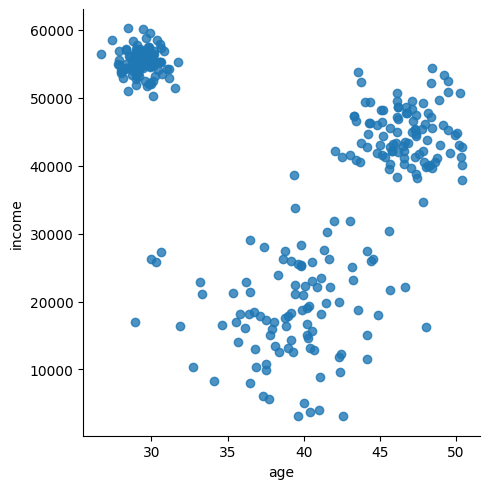

In [8]:
sns.lmplot(data=income_df,x="age",y="income",fit_reg=False)

In [9]:
from sklearn.cluster import KMeans

In [10]:
clusters=KMeans(n_clusters=3)

## Dataset is given in clusters

In [11]:
clusters.fit(income_df)

KMeans(n_clusters=3)

In [12]:
clusters.labels_

array([2, 0, 2, 1, 1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 0, 1, 2, 2, 1, 0, 1, 2,
       0, 2, 1, 1, 2, 1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 2, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 1,
       2, 0, 2, 0, 1, 1, 1, 1, 0, 2, 0, 1, 2, 2, 1, 2, 0, 2, 2, 0, 0, 1,
       2, 2, 1, 0, 1, 0, 0, 0, 2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 1, 2, 0, 0,
       2, 1, 0, 2, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       2, 1, 1, 0, 1, 2, 1, 1, 0, 2, 0, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 0,
       1, 1, 0, 0, 2, 0, 2, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 2, 1, 0, 0, 0,
       2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0,
       2, 0, 0, 0, 2, 1, 1, 2, 0, 2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 2, 0, 1,
       1, 1, 1, 0, 2, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0, 1, 1,
       2, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2], d

In [13]:
income_df['clusterid']=clusters.labels_

In [14]:
income_df.head()

,income,age,clusterid
0,41100.0,48.75,2
1,54100.0,28.10,0
2,47800.0,46.75,2
3,19100.0,40.25,1
4,18200.0,35.80,1


## Visualizing the new clusters

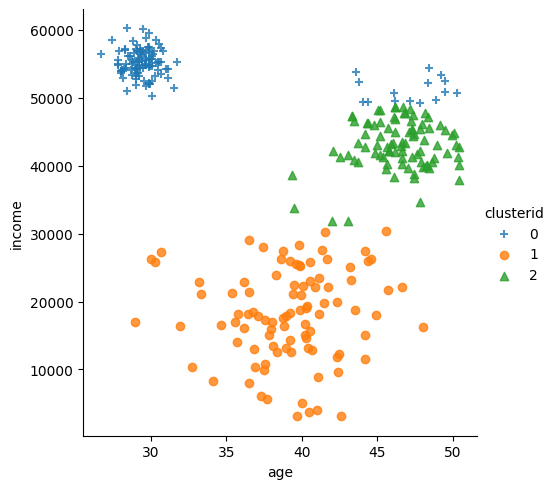

In [15]:
sns.lmplot(data=income_df,x="age",y="income",hue="clusterid",
           fit_reg=False,markers=['+','o','^'])

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()

In [18]:
scaled_income_df=scaler.fit_transform(income_df[["age","income"]])

In [19]:
cluster_new=KMeans(n_clusters=3)

In [20]:
cluster_new.fit(scaled_income_df)

KMeans(n_clusters=3)

In [21]:
income_df['clusterid_scaled']=cluster_new.labels_

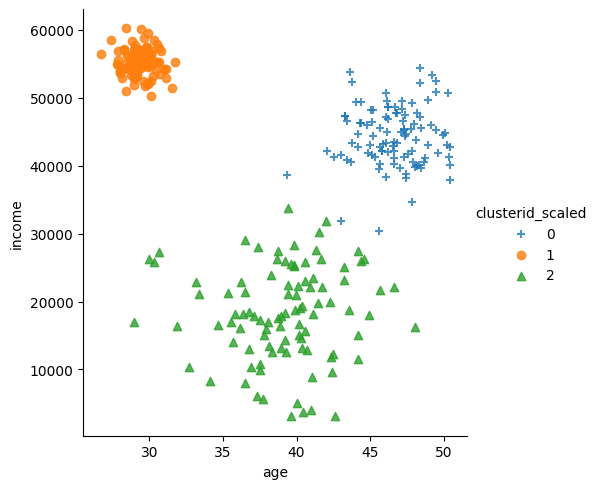

In [22]:
sns.lmplot(data=income_df,x="age",y="income",hue="clusterid_scaled",
           fit_reg=False,markers=['+','o','^'])

## Finding optimal clusters using elbow method

In [23]:
fdf=pd.read_csv('fruits.csv')

In [24]:
fdf.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [25]:
fdf['fruit_label'].unique()

array([1, 2, 3, 4])

In [26]:
x=fdf.iloc[:,3:7]

In [27]:
x.head()

,mass,width,height,color_score
0,192,8.4,7.3,0.55
1,180,8.0,6.8,0.59
2,176,7.4,7.2,0.60
3,86,6.2,4.7,0.80
4,84,6.0,4.6,0.79


In [28]:
x_scaled=scaler.fit_transform(fdf[["mass","width","height","color_score"]])

In [29]:
k=[]
wcss=[]
for num_clusters in range(1,11):
    k.append(num_clusters)
    clusters1=KMeans(num_clusters)
    clusters1.fit(x)
    wcss.append(clusters1.inertia_)

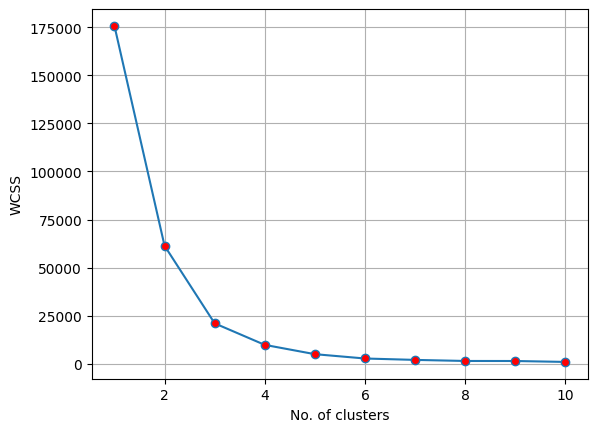

In [30]:
plt.plot(k,wcss,marker='o',mfc='r')
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.grid()

In [31]:
k1=[]
wcss1=[]
for num_clusters in range(1,11):
    k1.append(num_clusters)
    clusters2=KMeans(num_clusters)
    clusters2.fit(x_scaled)
    wcss1.append(clusters2.inertia_)

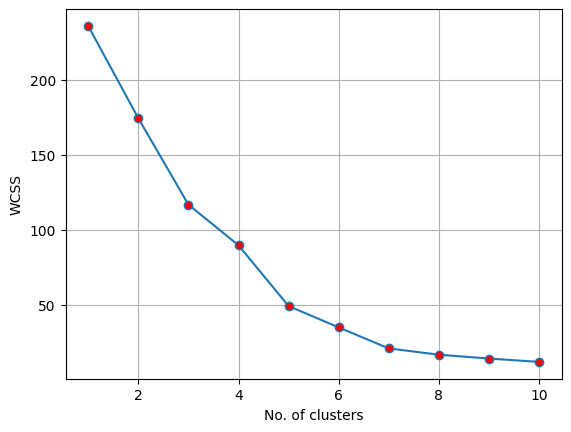

In [32]:
plt.plot(k1,wcss1,marker='o',mfc='r')
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.grid()

In [33]:
km_final=KMeans(n_clusters=5)

In [34]:
km_final.fit(x_scaled)

KMeans(n_clusters=5)

In [35]:
fdf["y_label"]=km_final.labels_

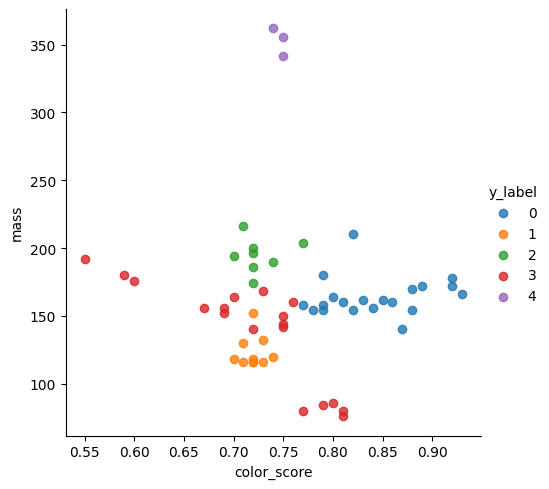

In [36]:
sns.lmplot(data=fdf,x="color_score",y="mass",
          hue="y_label",fit_reg=False)

In [37]:
fdf.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score,y_label
0,1,apple,granny_smith,192,8.4,7.3,0.55,3
1,1,apple,granny_smith,180,8.0,6.8,0.59,3
2,1,apple,granny_smith,176,7.4,7.2,0.60,3
3,2,mandarin,mandarin,86,6.2,4.7,0.80,3
4,2,mandarin,mandarin,84,6.0,4.6,0.79,3


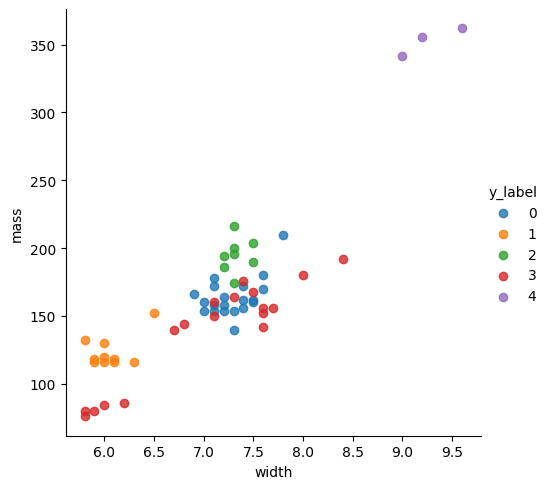

In [38]:
sns.lmplot(data=fdf,x="width",y="mass",
          hue="y_label",fit_reg=False)

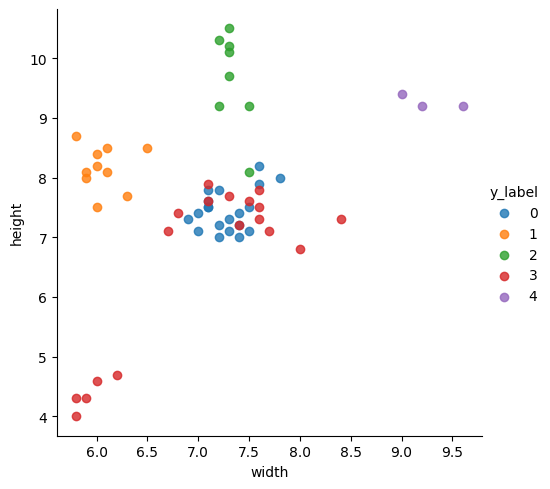

In [39]:
sns.lmplot(data=fdf,x="width",y="height",
          hue="y_label",fit_reg=False)

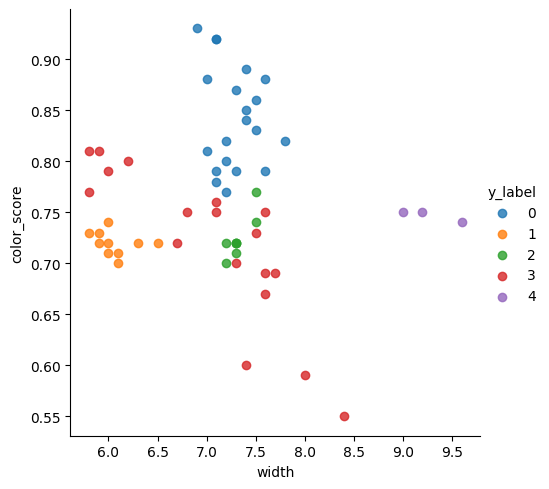

In [41]:
sns.lmplot(data=fdf,x="width",y="color_score",
          hue="y_label",fit_reg=False)

# Cluster evaluation metrics

In [42]:
from sklearn import metrics as mat

In [43]:
sil1=mat.silhouette_score(x,km_final.labels_)

In [44]:
sil1

np.float64(0.20511533739570417)

In [45]:
dbs=mat.davies_bouldin_score(x,km_final.labels_)

In [46]:
dbs

np.float64(1.5885671131741754)

In [47]:
mat.calinski_harabasz_score(x,km_final.labels_)

np.float64(60.87810070400494)

In [48]:
mat.adjusted_rand_score(fdf['fruit_label'],km_final.labels_)

0.2649594983015417

In [49]:
mat.mutual_info_score(fdf['fruit_label'],km_final.labels_)

np.float64(0.6562573092971563)

In [50]:
fdf.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score,y_label
0,1,apple,granny_smith,192,8.4,7.3,0.55,3
1,1,apple,granny_smith,180,8.0,6.8,0.59,3
2,1,apple,granny_smith,176,7.4,7.2,0.60,3
3,2,mandarin,mandarin,86,6.2,4.7,0.80,3
4,2,mandarin,mandarin,84,6.0,4.6,0.79,3


In [51]:
mat.accuracy_score(fdf['fruit_label'],fdf['y_label'])

0.0847457627118644

In [52]:
cm1=mat.confusion_matrix(fdf['fruit_label'],fdf['y_label'])

<Axes: >

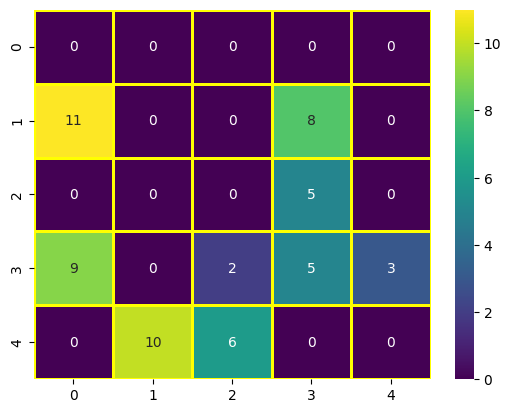

In [53]:
sns.heatmap(cm1,annot=True,cmap='viridis',linewidth=2,linecolor='yellow')

# Hierarchical clustering

In [54]:
beer_df=pd.read_csv('beer.csv')

In [55]:
beer_df.head()

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77


In [56]:
scaled_beer_df=scaler.fit_transform(beer_df[["calories","sodium","alcohol","cost"]])

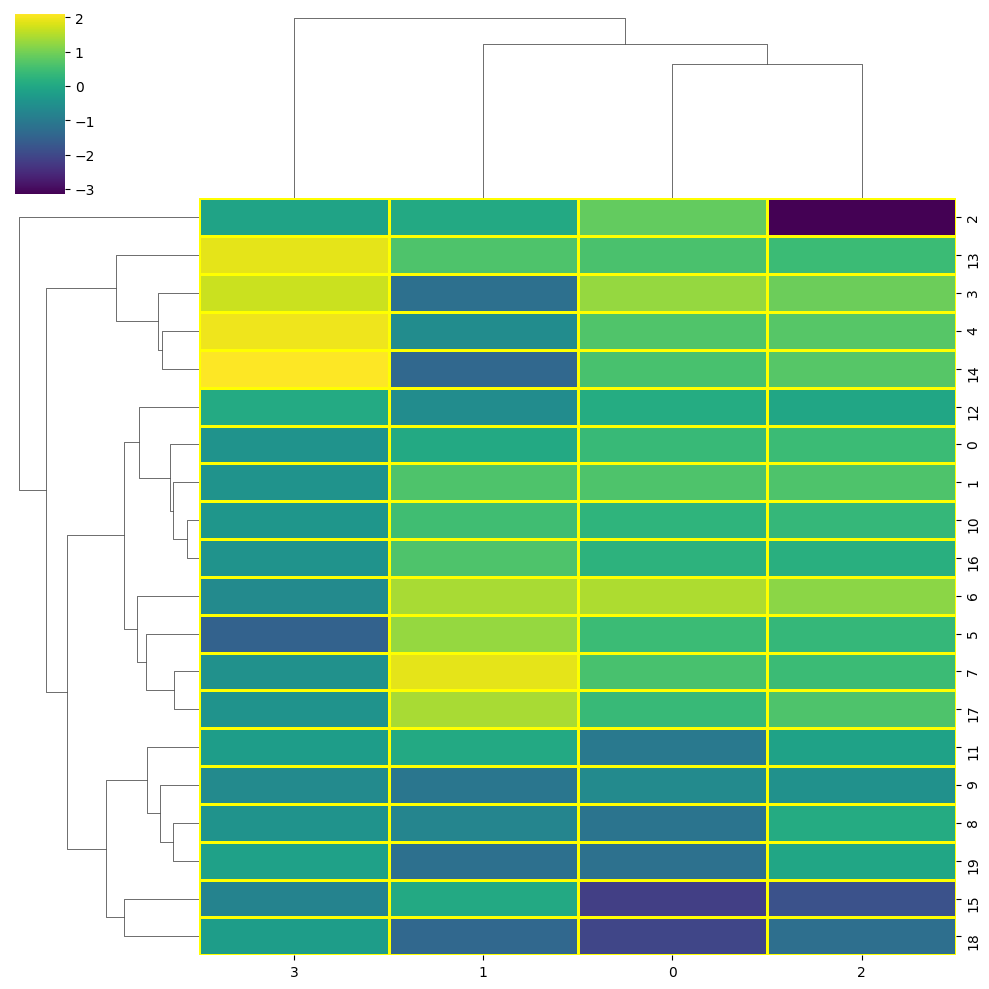

In [57]:
sns.clustermap(scaled_beer_df,cmap='viridis',linewidths=2,linecolor='yellow')

## Agglomerative hierarchical clustering

In [58]:
from sklearn.cluster import AgglomerativeClustering

In [59]:
agg=AgglomerativeClustering(n_clusters=3,linkage='complete')

In [60]:
cluster_label=agg.fit_predict(scaled_beer_df)

In [61]:
agg.labels_

array([2, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0])

In [62]:
beer_df['new_clusterid']=agg.labels_

In [63]:
beer_df.head()

,name,calories,sodium,alcohol,cost,new_clusterid
0,Budweiser,144,15,4.7,0.43,2
1,Schlitz,151,19,4.9,0.43,2
2,Lowenbrau,157,15,0.9,0.48,0
3,Kronenbourg,170,7,5.2,0.73,1
4,Heineken,152,11,5.0,0.77,1


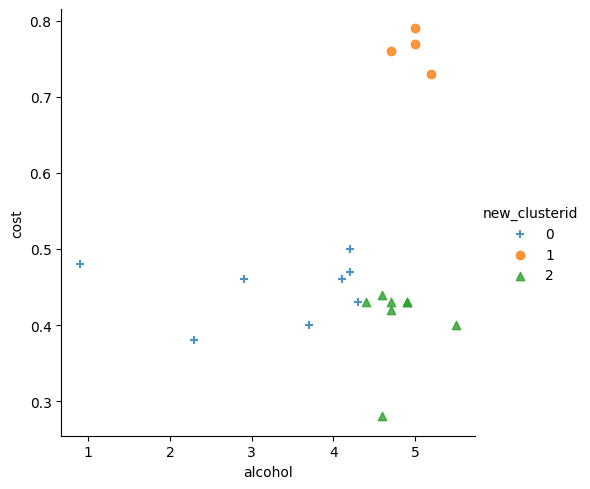

In [64]:
sns.lmplot(beer_df,x="alcohol",y="cost",hue="new_clusterid",
           fit_reg=False,markers=['+','o','^'])

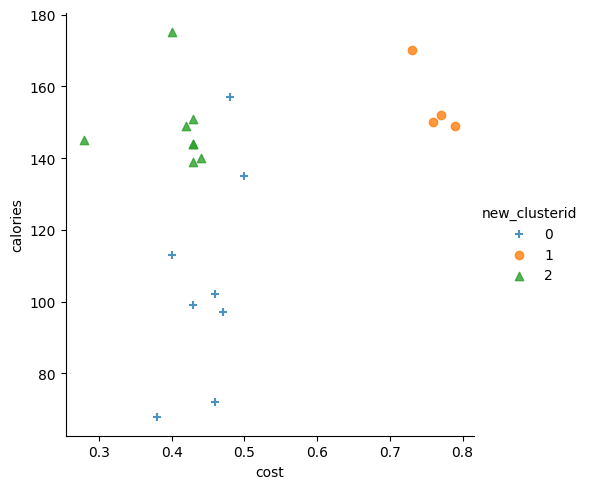

In [66]:
sns.lmplot(beer_df,x="cost",y="calories",hue="new_clusterid",
           fit_reg=False,markers=['+','o','^'])

In [67]:
y1=3+2**5//10

In [68]:
y1

6

In [69]:
2**5

32

In [70]:
32//10

3

In [71]:
32/10

3.2

In [72]:
32//10

3

In [73]:
32%10

2